In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import statistics
import random
import numpy as np

In [111]:
s = np.random.normal(0.5, 0.1, 1000)

# 1D Network

In [112]:
Test = nx.complete_graph(4)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


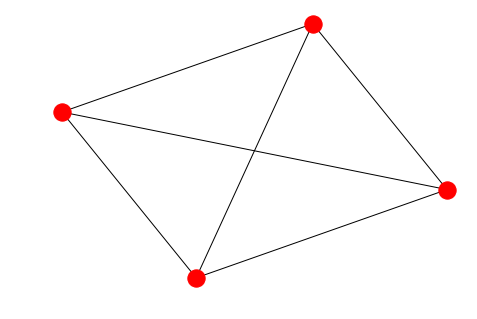

In [113]:
nx.draw(Test)

In [114]:
def build_graph_1D(N, 
                   s,
                   beta,
                   fitness_dist 
                   ):
    G = nx.Graph()
    G.add_node(0, fitness = random.choice(fitness_dist))
    G.add_node(1, fitness = random.choice(fitness_dist))
    G.add_edge(0,1)
    for source in range(N):
        G.add_node(source, fitness = random.choice(fitness_dist))
        zeta = sum([np.exp(-beta*dict(G.nodes())[i]['fitness'])*(1+s*(G.degree(i)-1)) for i in G.nodes])
        
        for i in G.nodes():
            if i != source:
                
                p = np.exp(-beta*dict(G.nodes())[i]['fitness'])*(1+s*(G.degree(i)-1))/zeta
                
                if random.random() <= p:
                    G.add_edge(source, i)
                    
                else:
                    pass
            else:
                pass
            
    return G

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


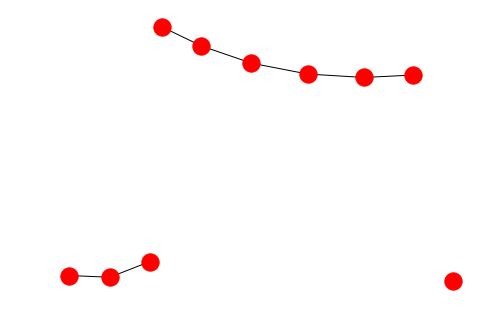

In [127]:
test_graph = build_graph_1D(10, -1, 0.1, s)
nx.draw(test_graph)

# 2D Network

In [155]:
B = nx.Graph()

In [156]:
B.add_edges_from([(0,1), (1,2), (2,0)])

In [12]:
dict(test_graph[0])

{1: {}, 3: {}, 7: {}}

In [4]:
class triad:
    
    def __init__(self, name, face_1, face_2, face_3):
        self.name = name 
        self.face_1 = face_1
        self.face_2 = face_2
        self.face_3 = face_3
        
    def fitness(self):
        return face_1.fitness() + face_2.fitness() + face_3.fitness()
    
    def add_neighbor(self, node_num, node_energy, name):
        link_1 = 

In [5]:
class face:
    
    def __init__(self, G, source, target, energy_source, energy_target):
        
        G.add_node(source, energy = energy_source)
        G.add_node(target, energy = energy_target)
        G.add_edge(source, target)
        
        self.graph = G
        self.name = (source, target)
        self.node_1 = G[source]
        self.node_2 = G[target]
        self.neighbors = []
        
    def fitness(self):
        return dict(self.graph.nodes())[self.name[0]]['energy'] + dict(self.graph.nodes())[self.name[0]]['energy']
    
    def add_neighbor(self, node_num, node_energy, name):
        face_1 = face(self.graph, node_num, self.name[0], node_energy, 
                      dict(self.graph.nodes())[self.name[0]]['energy'])
        face_2 = face(self.graph, node_num, self.name[1], node_energy, 
                      dict(self.graph.nodes())[self.name[1]]['energy'])
        name = triad(name, self, face_1, face_2)
        
        self.neighbors.append(name)
        
        return face_1, face_2
        
    def degree(self):
        return len(self.neighbors)

In [6]:
def prob_coefficient(face, flavour, beta):
    return np.exp(-beta * face.fitness())*(1 + flavour*face.degree())

In [30]:
del test_face

In [31]:
del test_2d

In [22]:
test_2d = nx.Graph()

In [24]:
test_face = face(test_2d, 0, 1, 0.1, 0.1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


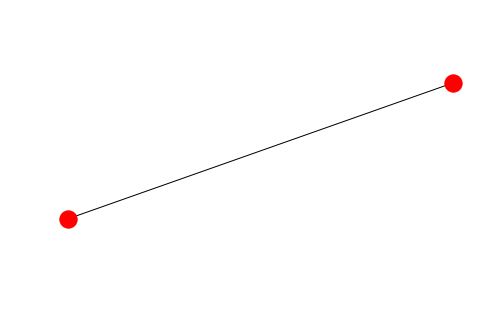

In [25]:
nx.draw(test_2d)

In [26]:
test_face.add_neighbor(2, 0.1, 2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


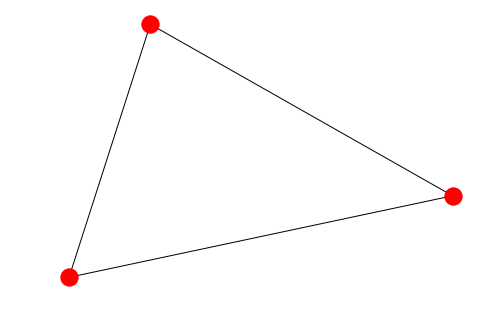

In [27]:
nx.draw(test_2d)

In [28]:
test_face.degree()

1

In [29]:
prob_coefficient(test_face, 1, 0.1)

1.9603973466135105

In [58]:
del first_face

In [62]:
del face

NameError: name 'face' is not defined

In [59]:
test_g = nx.Graph()

In [65]:
first_face = face(test_g, 0, 1, 0.1, 0.1)
lof = [first_face]
for i in range(2,20):
    a = random.choice(lof).add_neighbor(i, random.random(), i)
    lof.append(a[0])
    lof.append(a[1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


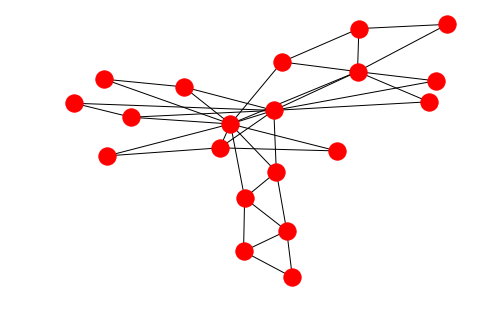

In [66]:
nx.draw(test_g)

In [ ]:
del test_prob
del first_prob

In [7]:
test_prob = nx.Graph()

In [8]:
first_prob = face(test_prob, 0, 1, 0.2, 0.1)

In [9]:
lof = [first_prob]

In [23]:
# m = 1, binomial energy dist, beta = 0.01
def test_faces(rand, lof):
    
    z = sum([prob_coefficient(i, 1, 0.01) for i in lof])
    
    possible_edges = [i for i in lof if prob_coefficient(i, 1, 0.01) >= rand]
    
    if len(possible_edges) > 0:
        a = random.choice(possible_edges).add_neighbor(i, random.choice(s), i)
        
        lof.append(a[0])
        lof.append(a[1])
    else:
        test_faces(random.random(), lof)

In [24]:
for i in range(2, 9):
    test_faces(random.random(), lof)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


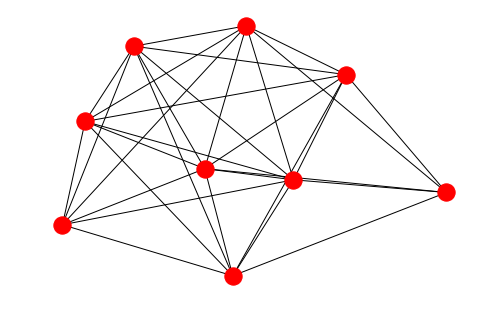

In [25]:
nx.draw(test_prob)

## First 2D Network

In [97]:
import time

In [82]:
def build_edges_2d(n, lof, flavour, beta, energy_distribution, rand = random.random()):
    
    z = sum([prob_coefficient(i, flavour, beta) for i in lof])
    
    possible_edges = [i for i in lof if prob_coefficient(i, flavour, beta) >= rand]
    
    if len(possible_edges) > 0:
        a = random.choice(possible_edges).add_neighbor(n, random.choice(energy_distribution), n)
        
        lof.append(a[0])
        lof.append(a[1])
    else:
        build_edges_2d(lof, flavour, beta, energy_distribution)
        
    return possible_edges

In [87]:
# m = 1, seed = 1 face
def build_network_2d(N, flavour, beta, energy_distribution):
    
    G = nx.Graph()
    
    first_face = face(G, 0, 1, random.choice(energy_distribution), random.choice(energy_distribution))
    
    lof = [first_face]
    
    for n in range(2, N):
        build_edges_2d(n, lof, flavour, beta, energy_distribution)
    
    return G

In [88]:
del test_1

In [89]:
test_1 = build_network_2d(10, 1, 0.01, s)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


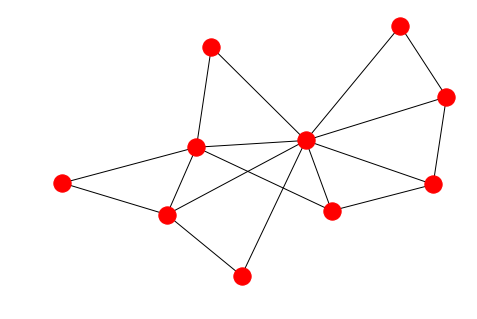

In [91]:
nx.draw(test_1)

In [92]:
test_neg_1 = build_network_2d(10, -1, 0.01, s)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


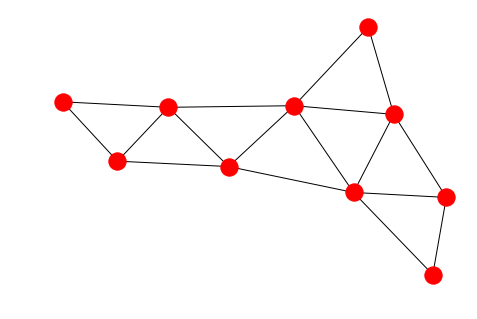

In [93]:
nx.draw(test_neg_1)

In [94]:
test_0 = build_network_2d(10, 0, 0.01, s)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


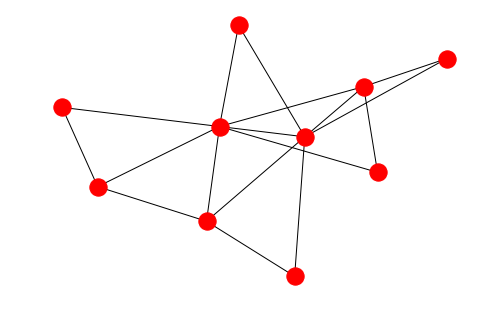

In [95]:
nx.draw(test_0)

In [98]:
start_time = time.time()
test_big = build_network_2d(100, -1, 0.01, s)
print(time.time() - start_time)

0.8158049583435059


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


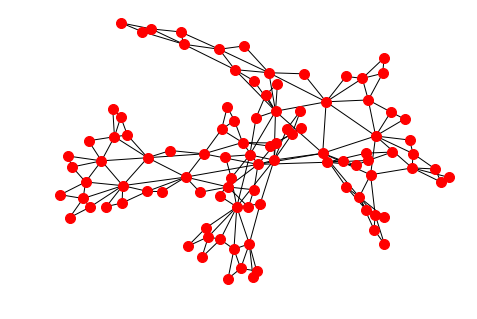

In [100]:
nx.draw(test_big, node_size = 100)

# 3D Networks

In [142]:
class tetra:
    
    def __init__(self, name, triad_1, triad_2, triad_3, triad_4):
        self.name = name
        self.triad_1 = triad_1
        self.triad_2 = triad_2
        self.triad_3 = triad_3
        self.triad_4 = triad_4

# Build Network

In [135]:
def build_network(dim, N, flavour, beta, energy_distribution):
    
    if dim == 1:
        return build_graph_1D(N, flavour, beta, energy_distribution)
    
    elif dim == 2: 
        return build_network_2d(N, flavour, beta, energy_distribution)
        
    else:
        print('That dimension is not yet supported :(')

In [138]:
t1 = build_network(1, 10, -1, 0.1, s)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


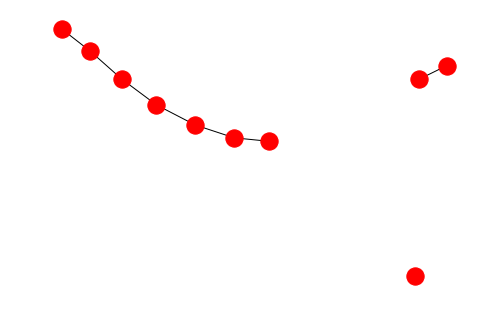

In [139]:
nx.draw(t1)

In [140]:
t2 = build_network(2, 10, -1, 0.1, s)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


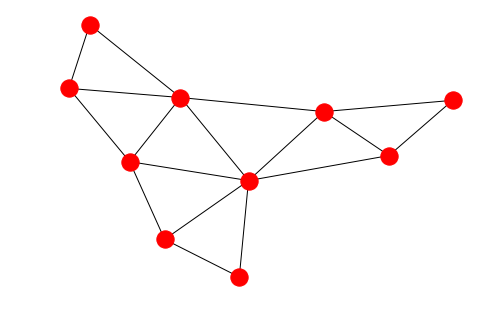

In [141]:
nx.draw(t2)